<a href="https://colab.research.google.com/github/chuancao26/islp/blob/main/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ISLP

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 28.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.5/849.5 kB 21.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 26.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.3/117.3 kB 5.3 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=cac2b5e2ed0018f149f6b2c78262aea9bfe1abe1223b700bf4b5b6e941f603e4
  Stored in directory: /root/.cache/pip/wheels/50/37/21/0a719b9d89c635e89ff24bd93b862882ad675279552013b2fb
Successfully built autograd-gamma


In [2]:
# librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from ISLP import load_data
from ISLP import confusion_table
from ISLP.models import (ModelSpec as MS, summarize)

sns.set_theme()

from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.naive_bayes import GaussianNB

from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm



# Ejercicios Conceptuales


## ejercicio 6


### a)

In [ ]:
# tenemos los siguientes datos:
b0 = -6
b1 = 0.05
b2 = 1


In [ ]:
# estimando la prob(y=k\X=x)
# x1 = hours studied
# x2 = undergrad GPA
# Y = Mark (A)
x1 = 40
x2 = 3.5
y = "A"

p_x = np.exp(b0 + b1*x1 + b2*x2) / (1 + np.exp(b0 + b1*x1 + b2*x2))
print(p_x)

0.37754066879814546


### b)

In [ ]:
p_x = 0
x1 = 40
while p_x < 0.5:
  x1 += 1
  p_x = np.exp(b0 + b1*x1 + b2*x2) / (1 + np.exp(b0 + b1*x1 + b2*x2))
print(f"with a value of x1: {x1}, we have a 50% chance of getting and A")

with a value of x1: 50, we have a 50% chance of getting and A


## Ejercicio 7

Bayes's theorem

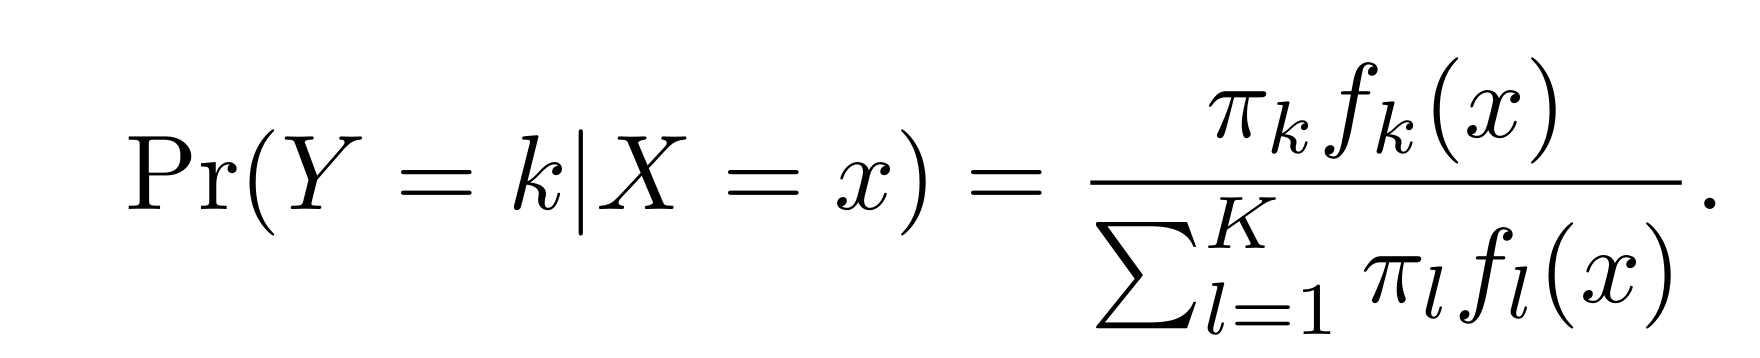

we want to predict if a stock will issue a dividend this year ("Yes" or "No") k = 2
X : Last year percent profit (p = 1)
$$\bar{X}_{yes} = 10$$
$$\bar{X} _{no}= 0$$
$$\hat{\sigma}^2 = 36$$
$$\pi_{yes} = 0.8$$
$$\pi_{no} = 0.2$$

In [ ]:
# we want to predict if a stock will issue a dividend this year ("Yes" or "No") k = 2
# X : Last year percent profit (p = 1)
x = 4
u_yes = 10
u_no = 0
var = 36
pApri_yes = 0.8
pApri_no = 0.2
p_yes = (pApri_yes * np.exp((-(x - u_yes) ** 2)/(2 * var ))) / (pApri_yes * np.exp((-(x - u_yes) ** 2)/(2 * var)) + pApri_no * np.exp((-(x - u_no) ** 2)/(2 * var )))

In [ ]:
p_yes

np.float64(0.7518524532975261)

##Ejercicio 8


En este caso podemos decir que elegimos el caso del test error rate de 30% correspondiente a el uso de la Logistic regresion. Debido a que es menor que el error rate de la 1-nn.
$$total\ error\ rate\ 1nn = 18% $$
$$total\ error\ rate\ 1nn = \frac{test\ error\ rate + training\ error\ rate}{2}$$
Cuando k tiene un parametros de 1, en clasificacion decimos que el algoritmo knn solo buscara 1 vecino el cual es el mismo punto. provocando que en el caso del training error rate sea de 0 ya que es un caso de overfitting.

$$total\ error\ rate\ 1nn = \frac{test\ error\ rate + 0\%}{2} = 18\%$$
$$test\ error\ rate\ 1nn = 36\%$$


## Ejercicio 9

### a

Tenemos que los odds:
$$odds=\frac{P(X)}{1-P(X)}$$
O dicho de otra forma, exito sobre fracaso.
$$0.37=\frac{P(X)}{1-P(X)}$$
$$0.37\times(1-P(X))=P(X)$$
$$0.37-0.37\times P(X)=P(X)$$
$$0.37=P(X)+0.37\times P(X)$$
$$\frac{0.37}{1.37}=P(X)$$
$$0.2707=P(X)$$




### b

X: chance of defaulting
$$P(X) = 0.16\%$$
$$odds = \frac{0.16}{0.84}$$
$$odds = 0.19$$



In [ ]:
0.16/0.84

0.1904761904761905

# Ejercicios Aplicados

## Ejercicio 13


In [ ]:
weekly = load_data("Weekly")

In [ ]:
weekly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1089 entries, 0 to 1088
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Year       1089 non-null   int64   
 1   Lag1       1089 non-null   float64 
 2   Lag2       1089 non-null   float64 
 3   Lag3       1089 non-null   float64 
 4   Lag4       1089 non-null   float64 
 5   Lag5       1089 non-null   float64 
 6   Volume     1089 non-null   float64 
 7   Today      1089 non-null   float64 
 8   Direction  1089 non-null   category
dtypes: category(1), float64(7), int64(1)
memory usage: 69.4 KB


In [ ]:
weekly.Year.value_counts()

,count
Year,
1996,53
2007,53
1992,52
1993,52
1991,52
2002,52
1994,52
1997,52
1995,52


In [ ]:
weekly.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


In [ ]:
weekly.Direction.value_counts()

,count
Direction,
Up,605
Down,484


In [ ]:
weekly.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,2000.048669,0.150585,0.151079,0.147205,0.145818,0.139893,1.574618,0.149899
std,6.033182,2.357013,2.357254,2.360502,2.360279,2.361285,1.686636,2.356927
min,1990.000000,-18.195000,-18.195000,-18.195000,-18.195000,-18.195000,0.087465,-18.195000
25%,1995.000000,-1.154000,-1.154000,-1.158000,-1.158000,-1.166000,0.332022,-1.154000
50%,2000.000000,0.241000,0.241000,0.241000,0.238000,0.234000,1.002680,0.241000
75%,2005.000000,1.405000,1.409000,1.409000,1.409000,1.405000,2.053727,1.405000
max,2010.000000,12.026000,12.026000,12.026000,12.026000,12.026000,9.328214,12.026000


In [ ]:
correlation = weekly.drop("Direction", axis=1).corr()
correlation

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,-0.032289,-0.033390,-0.030006,-0.031128,-0.030519,0.841942,-0.032460
Lag1,-0.032289,1.000000,-0.074853,0.058636,-0.071274,-0.008183,-0.064951,-0.075032
Lag2,-0.033390,-0.074853,1.000000,-0.075721,0.058382,-0.072499,-0.085513,0.059167
Lag3,-0.030006,0.058636,-0.075721,1.000000,-0.075396,0.060657,-0.069288,-0.071244
Lag4,-0.031128,-0.071274,0.058382,-0.075396,1.000000,-0.075675,-0.061075,-0.007826
Lag5,-0.030519,-0.008183,-0.072499,0.060657,-0.075675,1.000000,-0.058517,0.011013
Volume,0.841942,-0.064951,-0.085513,-0.069288,-0.061075,-0.058517,1.000000,-0.033078
Today,-0.032460,-0.075032,0.059167,-0.071244,-0.007826,0.011013,-0.033078,1.000000


<Axes: >

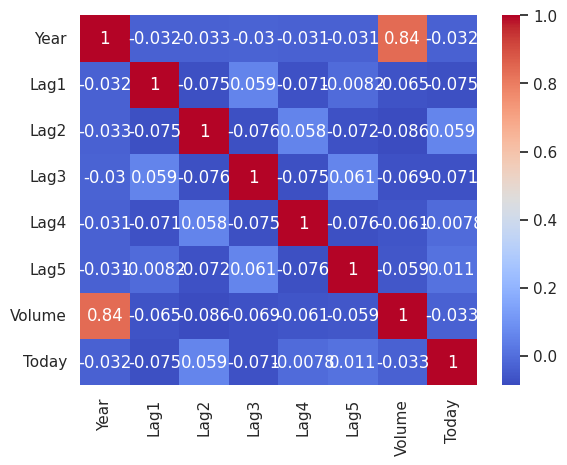

In [ ]:
sns.heatmap(correlation,
            annot=True,
            cmap="coolwarm")

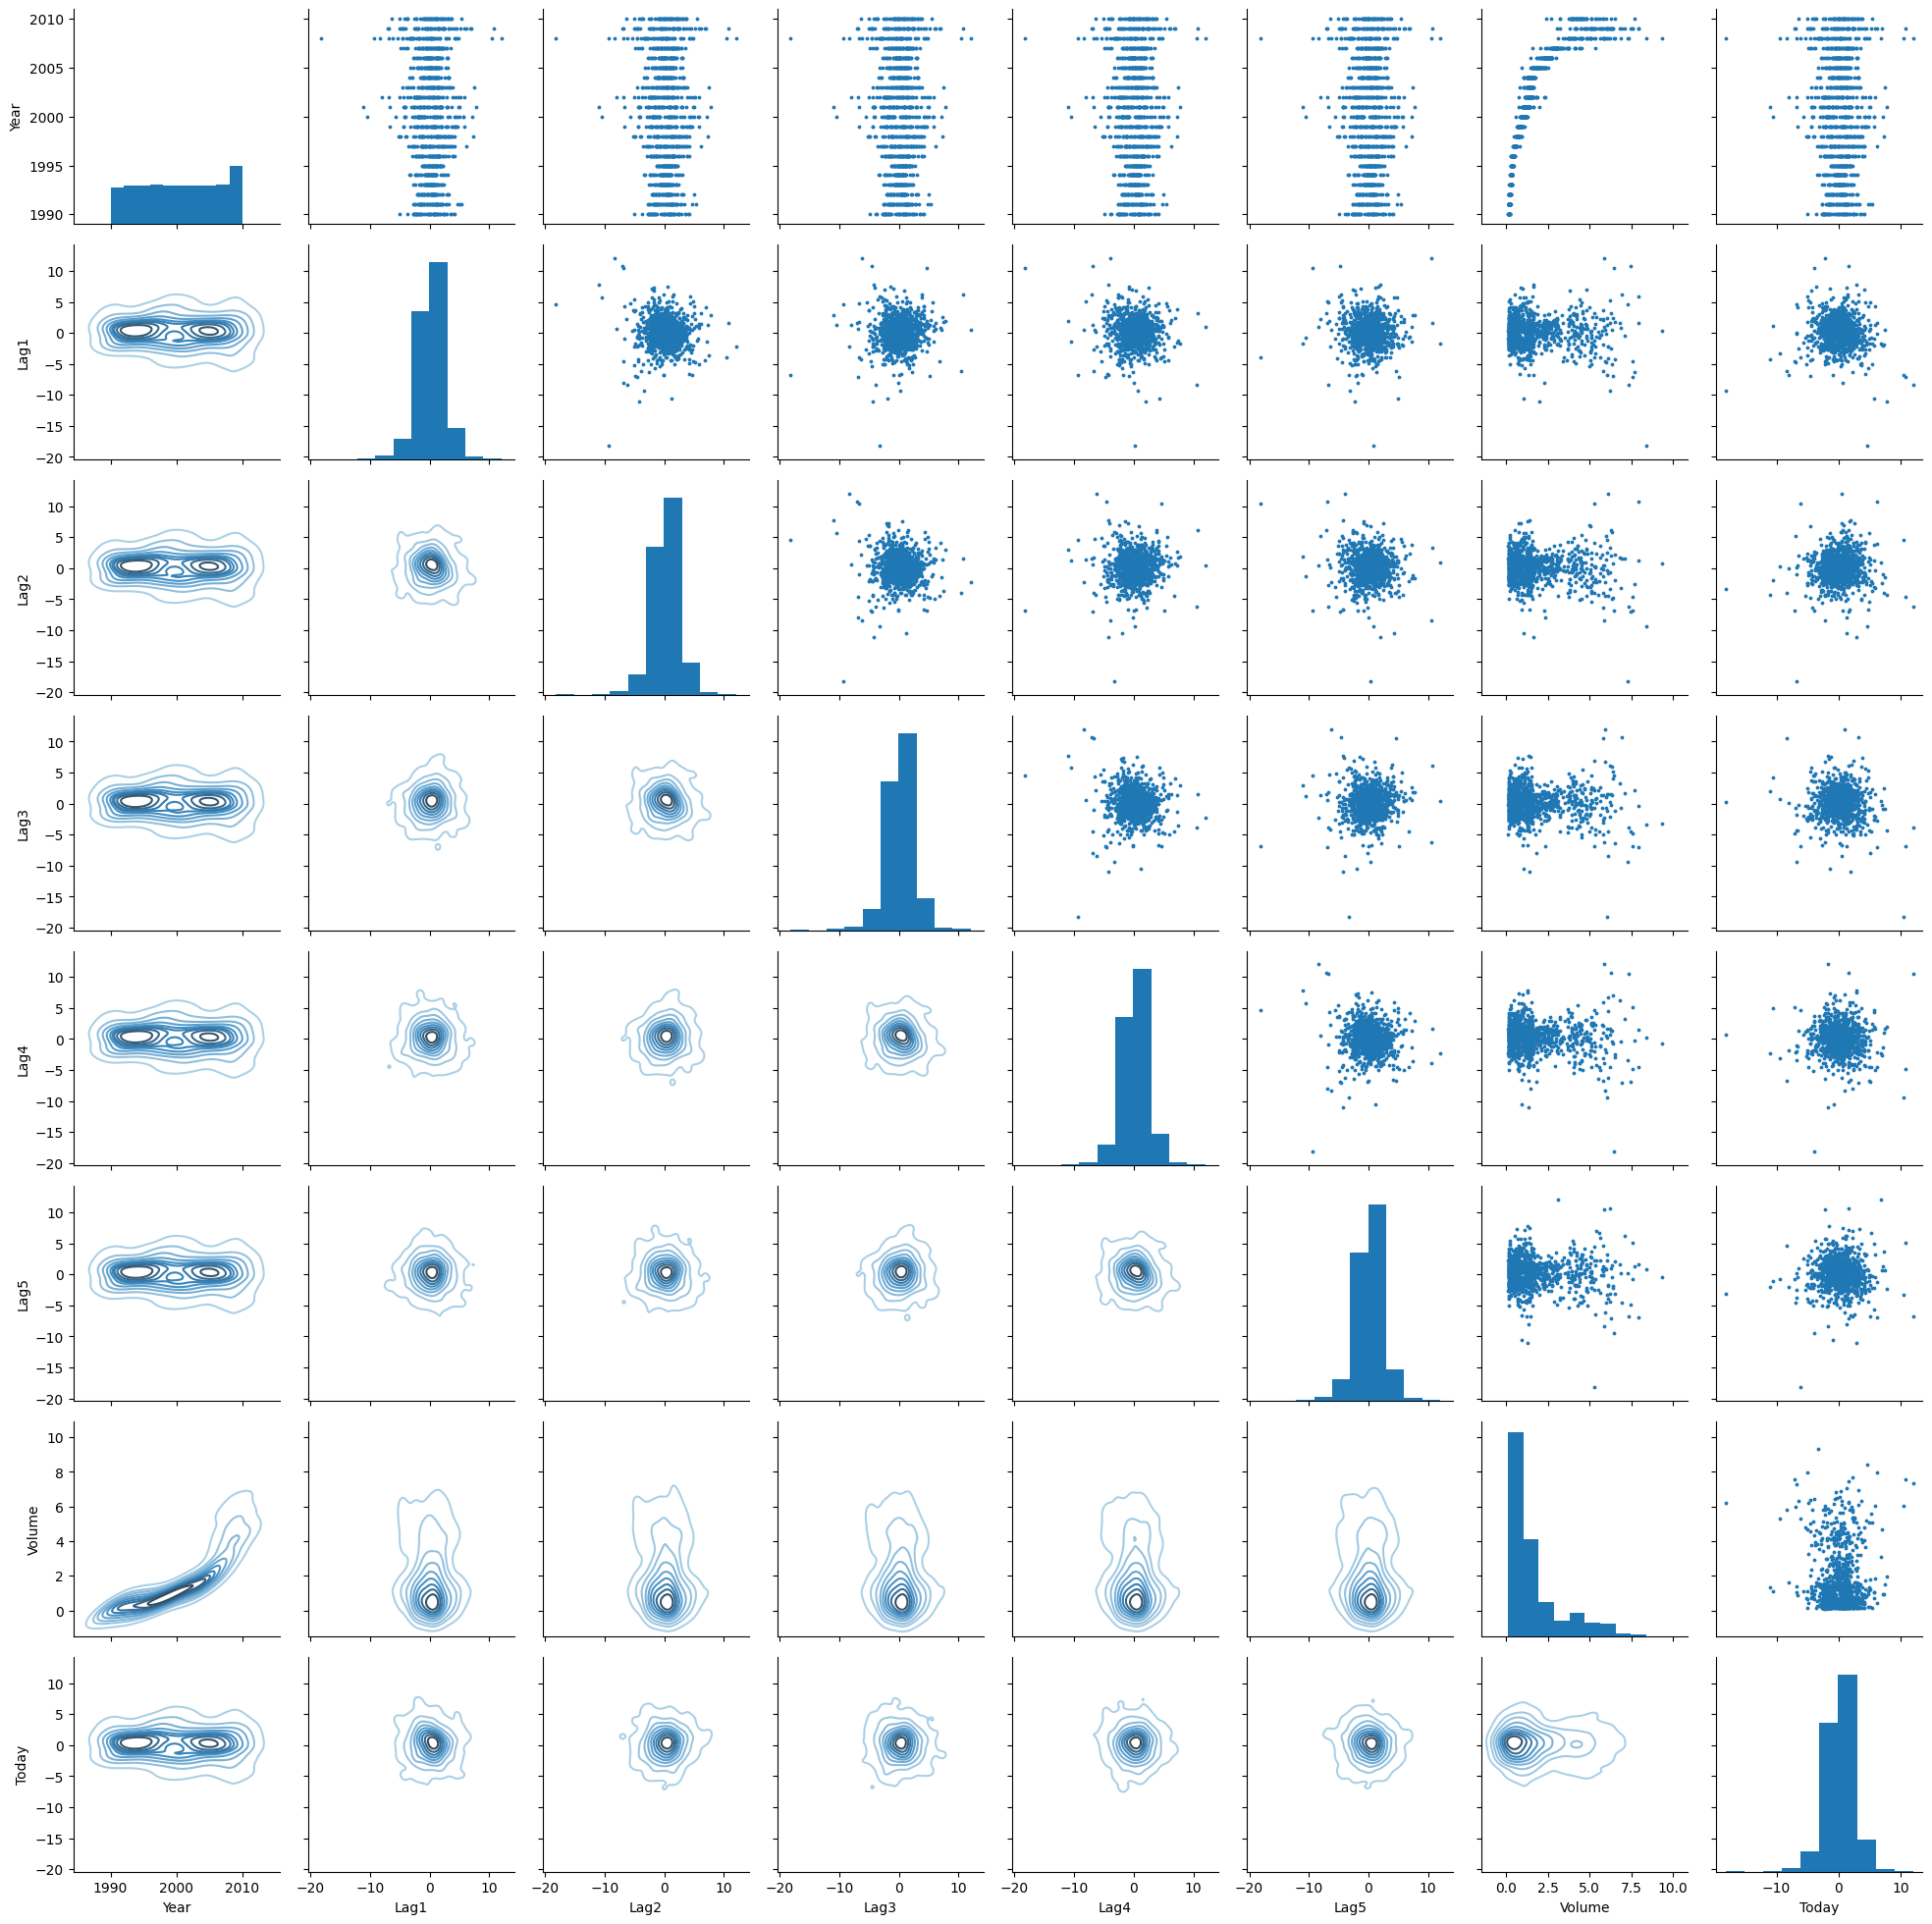

In [ ]:
g = sns.PairGrid(weekly)
g.map_upper(plt.scatter,
            s=3)
g.map_diag(plt.hist)
g.map_lower(sns.kdeplot, cmap="Blues_d")
# g.figure.set_size_inches(12,12)



In [ ]:
melt_weekly = weekly.melt(id_vars=["Direction"],
                          value_vars=["Today", "Lag1", "Lag2", "Lag3", "Lag4", "Lag5"],
                          var_name="Lag",
                          value_name="Value")
melt_weekly


,Direction,Lag,Value
0,Down,Today,-0.270
1,Down,Today,-2.576
2,Up,Today,3.514
3,Up,Today,0.712
4,Up,Today,1.178
...,...,...,...
6529,Up,Lag5,0.015
6530,Up,Lag5,3.599
6531,Up,Lag5,-2.173
6532,Up,Lag5,0.043


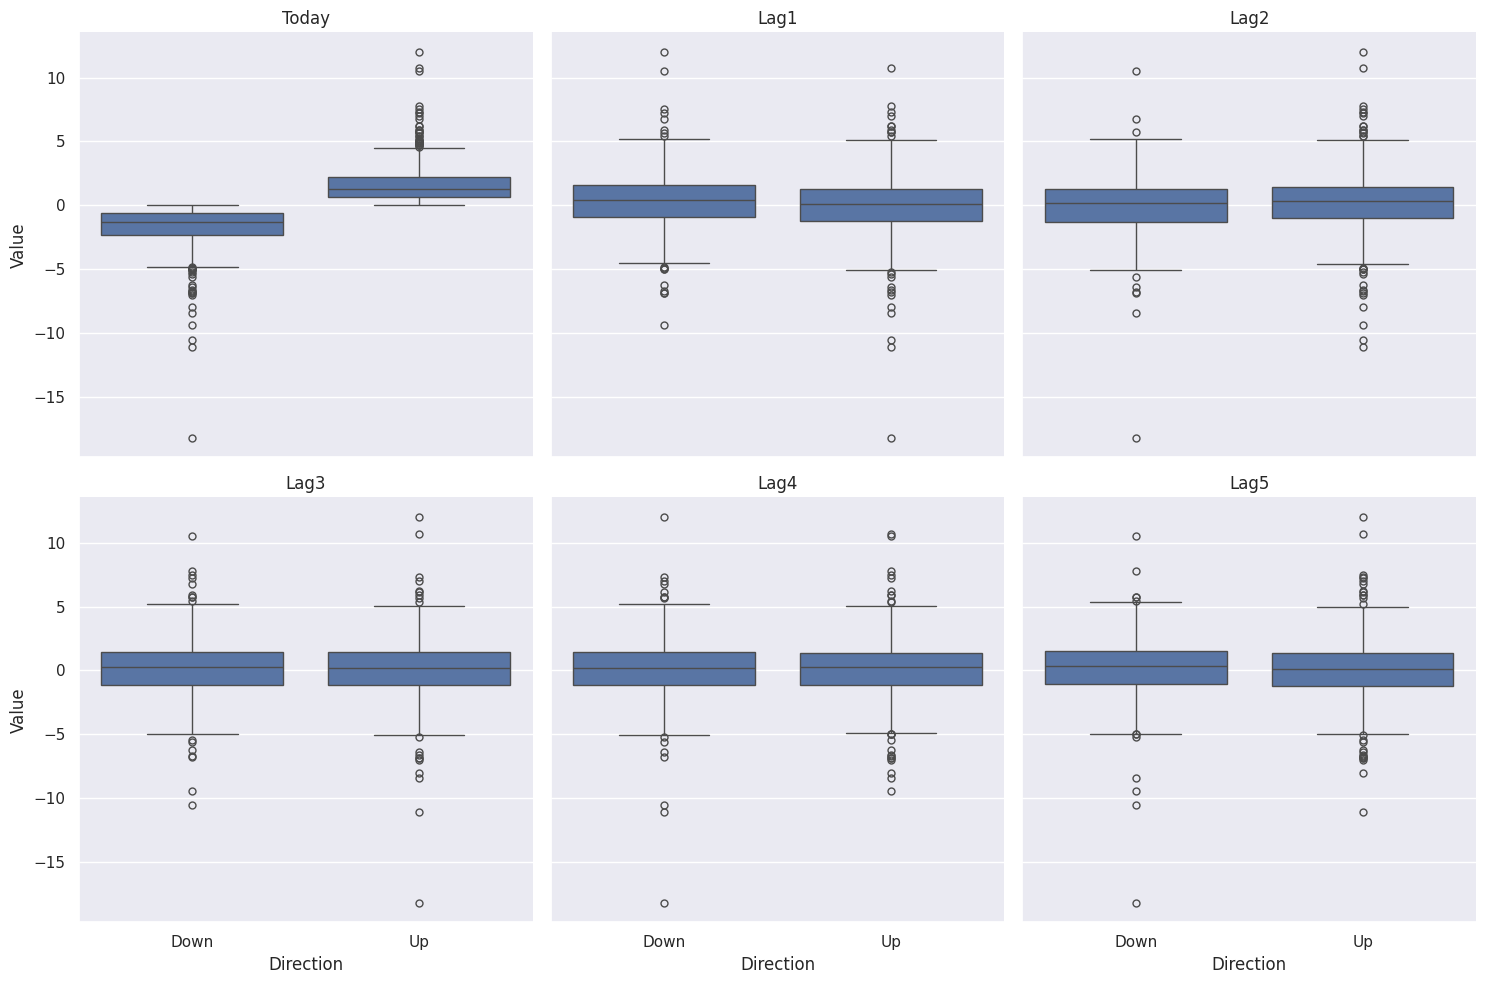

In [ ]:
g = sns.catplot(x="Direction",
                y="Value",
                data=melt_weekly,
                col="Lag",
                kind="box",
                col_wrap=3,
                aspect=1)
g.set_titles("{col_name}")
plt.show()

### b

In [ ]:
X = weekly.drop(["Year", "Today", "Direction"], axis=1)
X = sm.add_constant(X)

y = weekly.Direction == "Up"
y

,Direction
0,False
1,False
2,True
3,True
4,True
...,...
1084,True
1085,True
1086,True
1087,True


In [ ]:
# modelo logistico
model = sm.GLM(y, X,
               family=sm.families.Binomial())
result = model.fit()
print(result.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Direction   No. Observations:                 1089
Model:                            GLM   Df Residuals:                     1082
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -743.18
Date:                Sun, 30 Nov 2025   Deviance:                       1486.4
Time:                        22:24:45   Pearson chi2:                 1.09e+03
No. Iterations:                     4   Pseudo R-squ. (CS):           0.009000
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2669      0.086      3.106      0.0

Estadisticamente tenemos que las variables:
Lag1 y el Volume son significativas dado que su p-value < 0.05

### c


In [ ]:
print(confusion_table(result.fittedvalues > 0.5, y))

Truth      False  True 
Predicted              
False         54     48
True         430    557


In [ ]:
((result.predict(X) > 0.5) == y).mean()

np.float64(0.5610651974288338)

In [ ]:
(54 + 557)/1089

0.5610651974288338

In [ ]:

1 - (54 + 557)/1089

0.43893480257116624

El modelo logistico con los predictores definidos tiene un performance con un 56% de clasificaciones exitosas. y un 46% de error rate con los falsos verdaderos y los verdaderos etiquetados como falsos.
El modelo sufre mucho para poder etiquetar correctamente las direcciones de bajada. Cosa que no pasa con las subidas para los cuales tiene una matyor precision.

(array([  3.,   5.,  49., 332., 463., 183.,  41.,   7.,   2.,   4.]),
 array([0.2995979 , 0.35072593, 0.40185395, 0.45298198, 0.50411   ,
        0.55523803, 0.60636606, 0.65749408, 0.70862211, 0.75975013,
        0.81087816]),
 <BarContainer object of 10 artists>)

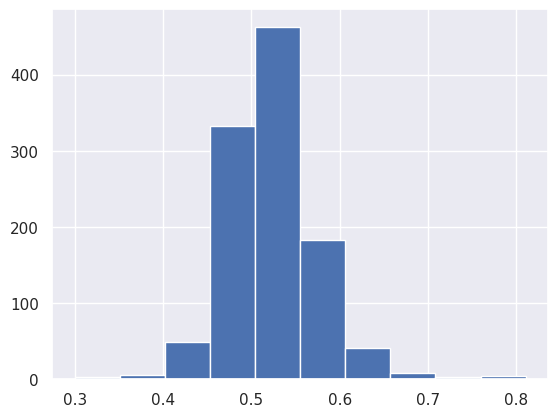

In [ ]:
plt.hist(result.fittedvalues)

### d

In [ ]:
mask = weekly.Year < 2009
X_train, X_test = weekly[mask][["Lag2"]], weekly[~mask][["Lag2"]]
y_train, y_test = weekly.Direction[mask] == "Up", weekly.Direction[~mask] == "Up"


In [ ]:
X_train, X_test = sm.add_constant(X_train), sm.add_constant(X_test)


In [ ]:
# modelo
model_Lag1 = sm.GLM(y_train,
                    X_train,
                    family=sm.families.Binomial())
result_Lag1 = model_Lag1.fit()
print(result_Lag1.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Direction   No. Observations:                  985
Model:                            GLM   Df Residuals:                      983
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -675.27
Date:                Sun, 30 Nov 2025   Deviance:                       1350.5
Time:                        22:53:25   Pearson chi2:                     985.
No. Iterations:                     4   Pseudo R-squ. (CS):           0.004221
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2033      0.064      3.162      0.0

In [ ]:
# matriz de confucion con los datos de testeo
predict_test = result_Lag1.predict(X_test) > 0.5
print(confusion_table(predict_test, y_test))


Truth      False  True 
Predicted              
False          9      5
True          34     56


In [ ]:
(y_test == predict_test).mean()

np.float64(0.625)

In [ ]:
(56 + 5) / y_test.shape[0]

0.5865384615384616

Obtenemos un accuracy de 62.5% lo cual es mejor que hacer una adivinacion con probabilidad de 50%. y en el caso de que elijamos solo UP tendriamos una mejora del 3.5% aproximadamente.

### e

In [ ]:
# LDA
#+++++++===========
# datos
mask = weekly.Year < 2009
X_train, X_test = weekly[mask][["Lag2"]], weekly[~mask][["Lag2"]]
y_train, y_test = weekly.Direction[mask], weekly.Direction[~mask]

X_train, X_test = sm.add_constant(X_train), sm.add_constant(X_test)


In [ ]:
# modelo LDA
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)
predicted_lda = lda_model.predict_proba(X_test)

In [ ]:
lda_model.classes_

array(['Down', 'Up'], dtype='<U4')

In [ ]:
predicted_lda = predicted_lda[:, 1] > 0.5
predicted_lda = np.where(predicted_lda == True, "Up", "Down")


In [ ]:
print(confusion_table(predicted_lda, y_test))

Truth      Down  Up
Predicted          
Down          9   5
Up           34  56


In [ ]:
# accuracy
(predicted_lda == y_test).mean()

np.float64(0.625)

### f

In [ ]:
# QDA
# datos
mask = weekly.Year < 2009
X_train, X_test = weekly[mask][["Lag2"]], weekly[~mask][["Lag2"]]
y_train, y_test = weekly.Direction[mask], weekly.Direction[~mask]

X_train, X_test = sm.add_constant(X_train), sm.add_constant(X_test)

In [ ]:
# modelo
qda_model = QuadraticDiscriminantAnalysis(store_covariance=True,
                                          reg_param=0.01)
qda_model.fit(X_train, y_train)
predicted_qda = qda_model.predict(X_test)

In [ ]:
print(confusion_table(predicted_qda,y_test))

Truth      Down  Up
Predicted          
Down          0   0
Up           43  61


In [ ]:
(predicted_qda == y_test).mean()

np.float64(0.5865384615384616)

In [ ]:
61/104

0.5865384615384616

### g

In [ ]:
# KNN con K = 1
#datos

mask = weekly.Year < 2009
X_train, X_test = weekly[mask][["Lag2"]], weekly[~mask][["Lag2"]]
y_train, y_test = weekly.Direction[mask], weekly.Direction[~mask]

X_train, X_test = sm.add_constant(X_train), sm.add_constant(X_test)

In [ ]:
# modelo
knn = KNN(n_neighbors=1)
knn.fit(X_train, y_train)
predicted_knn = knn.predict(X_train)

In [ ]:
print(confusion_table(predicted_knn, y_train))

Truth      Down   Up
Predicted           
Down        417   19
Up           24  525


In [ ]:
(predicted_knn == y_train).mean()

np.float64(0.9563451776649746)

### h

In [ ]:
# naive Bayes
# datos

mask = weekly.Year < 2009
X_train, X_test = weekly[mask][["Lag2"]], weekly[~mask][["Lag2"]]
y_train, y_test = weekly.Direction[mask], weekly.Direction[~mask]

X_train, X_test = sm.add_constant(X_train), sm.add_constant(X_test)

In [ ]:
model_naive = GaussianNB()
model_naive.fit(X_train, y_train)
predicted_naive = model_naive.predict(X_test)

In [ ]:
print(confusion_table(predicted_naive, y_test))

Truth      Down  Up
Predicted          
Down          0   0
Up           43  61


In [ ]:
(predicted_naive == y_test).mean()

np.float64(0.5865384615384616)

### i

Podemos decir que los modelos LDA y Logistic Regression tuvieron el mejor accuracy. Estos modelos logran ser mejores que la adivinacion simple por 12.5% y que solo poner la clase mas comun por un 3.85% con datos de entrenamiento.

### j


Logistic modifications

In [ ]:
# ms = MS(["Lag1", "Lag2", ("Lag1", "Lag2")])
ms = MS(["Lag2"])

mask = weekly.Year < 2009

weekly_train = weekly[mask]
weekly_test = weekly[~mask]

X_train, X_test = ms.fit_transform(weekly_train), ms.fit_transform(weekly_test)
y_train, y_test = weekly_train.Direction, weekly_test.Direction

model = LogisticRegression()
results = model.fit(X_train, y_train)

predicted = model.predict(X_test)
np.mean(y_test == predicted)


np.float64(0.625)

In [ ]:
from sklearn.metrics import confusion_matrix

def get_accuracy(ms, model):

  mask = weekly.Year < 2009
  weekly_train = weekly[mask]
  weekly_test = weekly[~mask]

  X_train, X_test = ms.fit_transform(weekly_train), ms.fit_transform(weekly_test)
  y_train, y_test = weekly_train.Direction, weekly_test.Direction

  model.fit(X_train, y_train)

  predicted = model.predict(X_test)
  acc = (y_test == predicted).mean()
  cm = confusion_matrix(y_test, predicted)
  return acc, cm

In [ ]:
weekly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1089 entries, 0 to 1088
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Year       1089 non-null   int64   
 1   Lag1       1089 non-null   float64 
 2   Lag2       1089 non-null   float64 
 3   Lag3       1089 non-null   float64 
 4   Lag4       1089 non-null   float64 
 5   Lag5       1089 non-null   float64 
 6   Volume     1089 non-null   float64 
 7   Today      1089 non-null   float64 
 8   Direction  1089 non-null   category
dtypes: category(1), float64(7), int64(1)
memory usage: 69.4 KB


In [ ]:
# individual
features = ["Lag1", "Lag2", "Lag3", "Lag4", "Lag5", "Volume"]
for feature in features:
  ms = MS([feature])
  print(f"Using {feature}, accuracy: {get_accuracy(ms, LogisticRegression())}")


Using Lag1, accuracy: 0.5673076923076923
Using Lag2, accuracy: 0.625
Using Lag3, accuracy: 0.5865384615384616
Using Lag4, accuracy: 0.5865384615384616
Using Lag5, accuracy: 0.5576923076923077
Using Volume, accuracy: 0.4423076923076923


In [ ]:
features = ["Lag1", "Lag2"]
ms = MS(features)
print(f"Using {features}, accuracy: {get_accuracy(ms, LogisticRegression())}")


Using ['Lag1', 'Lag2'], accuracy: 0.5769230769230769


In [ ]:
features = ["Lag1", "Lag2", "Lag3"]
ms = MS(features)
print(f"Using {features}, accuracy: {get_accuracy(ms, LogisticRegression())}")

Using ['Lag1', 'Lag2', 'Lag3'], accuracy: 0.5769230769230769


In [ ]:
features = ["Lag5", "Lag4"]
ms = MS(features)
print(f"Using {features}, accuracy: {get_accuracy(ms, LogisticRegression())}")

Using ['Lag5', 'Lag4'], accuracy: 0.5576923076923077


In [ ]:
features = ["Lag2", "Lag4", "Lag5"]
ms = MS(features)
print(f"Using {features}, accuracy: {get_accuracy(ms, LogisticRegression())}")

Using ['Lag2', 'Lag4', 'Lag5'], accuracy: 0.6153846153846154


In [ ]:
features = ["Lag2", "Lag4", "Lag5", ("Lag2", "Volume")]
ms = MS(features)
print(f"Using {features}, accuracy: {get_accuracy(ms, LogisticRegression())}")

Using ['Lag2', 'Lag4', 'Lag5', ('Lag2', 'Volume')], accuracy: 0.5961538461538461


In [ ]:
features = ["Lag2", "Lag3", "Lag5", ("Lag2", "Lag3"), ("Lag2", "Lag")]
ms = MS(features)
print(f"Using {features}, accuracy: {get_accuracy(ms, LogisticRegression())}")

Using ['Lag2', 'Lag3', 'Lag5', ('Lag2', 'Lag3'), ('Lag2', 'Lag5')], accuracy: 0.6057692307692307


In [ ]:
features = ["Lag2", "Lag3", "Lag5", ("Lag2", "Lag3"), ("Lag2", "Volume")]
ms = MS(features)
print(f"Using {features}, accuracy: {get_accuracy(ms, LogisticRegression())}")

Using ['Lag2', 'Lag3', 'Lag5', ('Lag2', 'Lag3'), ('Lag2', 'Volume')], accuracy: 0.6153846153846154


In [ ]:
# diferentes modelos
models = [LogisticRegression(),
          GaussianNB(),
          LinearDiscriminantAnalysis(),
          QuadraticDiscriminantAnalysis(
              store_covariance=True,
              reg_param=0.01),
          KNN(
              n_neighbors=1
          )]
features = ["Lag2", "Lag3", "Lag5", ("Lag2", "Lag2"), ("Lag2", "Volume")]
for model in models:
  ms = MS(features)
  print(f"Using {features}, accuracy: {get_accuracy(ms, model)}")

Using ['Lag2', 'Lag3', 'Lag5', ('Lag2', 'Lag2'), ('Lag2', 'Volume')], accuracy: (np.float64(0.5769230769230769), array([[11, 32],
       [12, 49]]))
Using ['Lag2', 'Lag3', 'Lag5', ('Lag2', 'Lag2'), ('Lag2', 'Volume')], accuracy: (np.float64(0.5096153846153846), array([[14, 29],
       [22, 39]]))
Using ['Lag2', 'Lag3', 'Lag5', ('Lag2', 'Lag2'), ('Lag2', 'Volume')], accuracy: (np.float64(0.5865384615384616), array([[10, 33],
       [10, 51]]))
Using ['Lag2', 'Lag3', 'Lag5', ('Lag2', 'Lag2'), ('Lag2', 'Volume')], accuracy: (np.float64(0.625), array([[12, 31],
       [ 8, 53]]))
Using ['Lag2', 'Lag3', 'Lag5', ('Lag2', 'Lag2'), ('Lag2', 'Volume')], accuracy: (np.float64(0.5288461538461539), array([[19, 24],
       [25, 36]]))


In [ ]:
accuracy = np.zeros(100, dtype=float)
best_k = -1
best_accuracy = 0.0
best_confusion_matrix = None

for i in range(1, 100):
  knn = KNN(n_neighbors=i)
  ms = MS(features)
  current_accuracy, current_cm = get_accuracy(ms, knn)
  accuracy[i] = current_accuracy

  if current_accuracy > best_accuracy:
    best_accuracy = current_accuracy
    best_k = i
    best_confusion_matrix = current_cm

print(f"Max accuracy: {best_accuracy}")
print(f"Best K: {best_k}")
print(f"Best Confusion Matrix:\n{best_confusion_matrix}")

Max accuracy: 0.6442307692307693
Best K: 19
Best Confusion Matrix:
[[22 21]
 [16 45]]


## Ejercicio 14

In [5]:
auto = load_data("Auto")

In [6]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, chevrolet chevelle malibu to chevy s-10
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 27.6+ KB


### a

In [7]:
auto.mpg.median()

22.75

In [8]:
 auto.mpg.mean()

np.float64(23.445918367346938)

<Axes: ylabel='Frequency'>

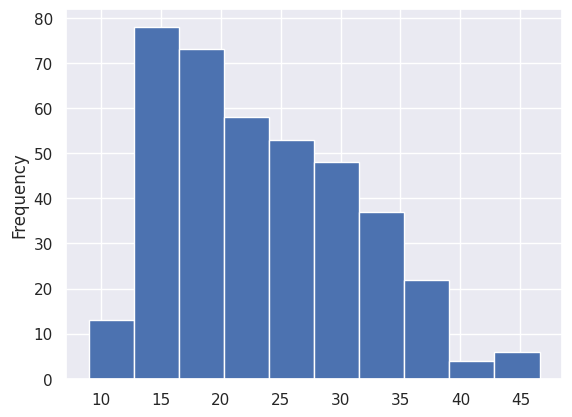

In [9]:
auto.mpg.plot(kind="hist")

In [10]:
auto["mpg01"] = auto.mpg.map(lambda x: 1 if x > auto.mpg.median() else 0)

In [11]:
auto.mpg01.value_counts()

,count
mpg01,
0,196
1,196


### b

In [12]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, chevrolet chevelle malibu to chevy s-10
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   mpg01         392 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 38.7+ KB


In [13]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg01
name,,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1,0
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1,0
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1,0
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1,0
ford torino,17.0,8,302.0,140,3449,10.5,70,1,0


In [14]:
auto.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg01
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209,0.836939
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932,-0.759194
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535,-0.753477
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171,-0.667053
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005,-0.757757
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746,0.346822
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528,0.429904
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000,0.513698
mpg01,0.836939,-0.759194,-0.753477,-0.667053,-0.757757,0.346822,0.429904,0.513698,1.000000


In [15]:
auto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg01
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531,0.500000
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518,0.500639
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000,0.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000,0.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000,0.500000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000,1.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000,1.000000


<Axes: >

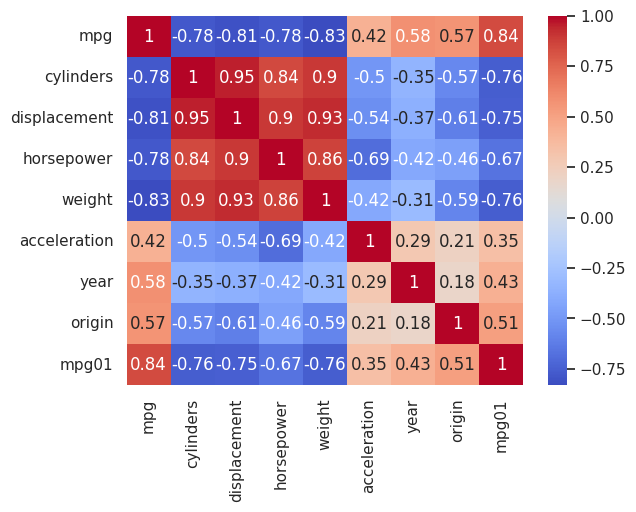

In [16]:
sns.heatmap(auto.corr(),
            annot=True,
            cmap="coolwarm")

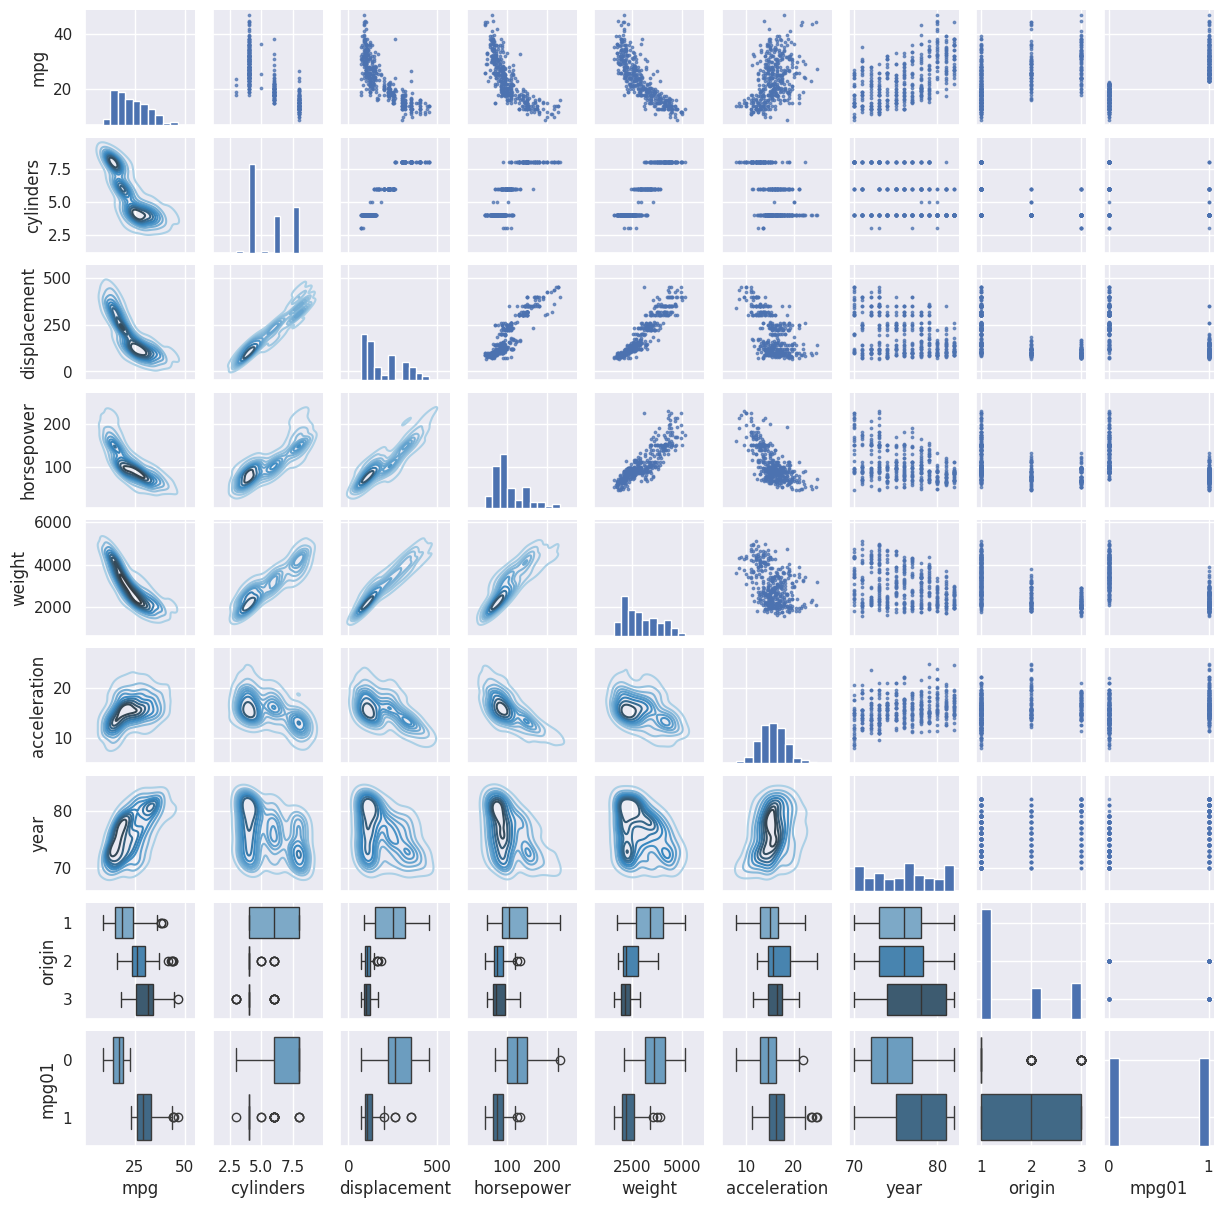

In [17]:
g = sns.PairGrid(auto)
g.map_upper(plt.scatter, s=3, alpha=0.7)
g.map_diag(plt.hist)
def lower_graphs(x, y, **kwargs):
  if y.name in ["origin", "mpg01"]:
    num_colors_needed = y.nunique()
    sns.boxplot(x=x, y=y, orient="h",
                hue=y,
                palette=sns.color_palette("Blues_d", n_colors=num_colors_needed),
                **kwargs)
  else:
    sns.kdeplot(x=x, y=y, cmap="Blues_d", **kwargs)
g.map_lower(lower_graphs)
g.figure.set_size_inches(12, 12);




In [ ]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg01
name,,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1,0
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1,0
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1,0
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1,0
ford torino,17.0,8,302.0,140,3449,10.5,70,1,0


In [18]:
## features = ["cylinders", "displacement", "horsepower", "weight", "acceleration",
  #          "year", "origin"]


features = ['cylinders', 'displacement', 'horsepower', 'weight']

design = MS(features)
X = design.fit_transform(auto)
y = auto.mpg01


### c

In [19]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=1)

### d

In [20]:
model = LinearDiscriminantAnalysis()
model.fit(X_train, y_train)
predicted = model.predict(X_test)
np.mean(y_test != predicted)

np.float64(0.0847457627118644)

### e

In [21]:
model = QuadraticDiscriminantAnalysis(store_covariance=True,
                                    reg_param=0.01)
model.fit(X_train, y_train)
predicted = model.predict(X_test)
np.mean(y_test != predicted)

np.float64(0.07627118644067797)

### f

In [22]:
model = LogisticRegression()

model.fit(X_train, y_train)
predicted = model.predict(X_test)
np.mean(y_test != predicted)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


np.float64(0.0847457627118644)

### g

In [23]:
model = GaussianNB()
model.fit(X_train, y_train)
predicted = model.predict(X_test)
np.mean(y_test != predicted)

np.float64(0.0847457627118644)

### h

In [24]:
min = 100
k_min = 1
for i in range(1, 200):
  model = KNN(n_neighbors=i)
  model.fit(X_train, y_train)
  predicted = model.predict(X_test)
  if min > np.mean(y_test != predicted):
    min = np.mean(y_test != predicted)
    k_min = i
print(f"{min} con k={k_min}")



0.0847457627118644 con k=8


## Ejericicio 15

### a

In [29]:
def power(x):
  print(x ** 3)

In [26]:
power(2)

8


### b

In [28]:
def power2(x, a):
  print(x ** a)

In [30]:
power2(3,8)

6561


### c

In [31]:
power2(10,3)

1000


In [32]:
power2(8,17)

2251799813685248


In [33]:
power2(131,3)

2248091


### d


In [34]:
def power3(x, a):
  return x ** a

In [40]:
fx = power3(x, 2)
fx

array([  1,   4,   9,  16,  25,  36,  49,  64,  81, 100])

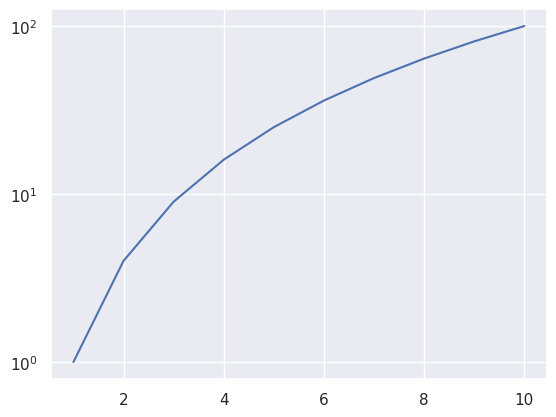

In [44]:
fig, ax = plt.subplots()
ax.plot(x, fx)
ax.set_yscale("log")
plt.show()

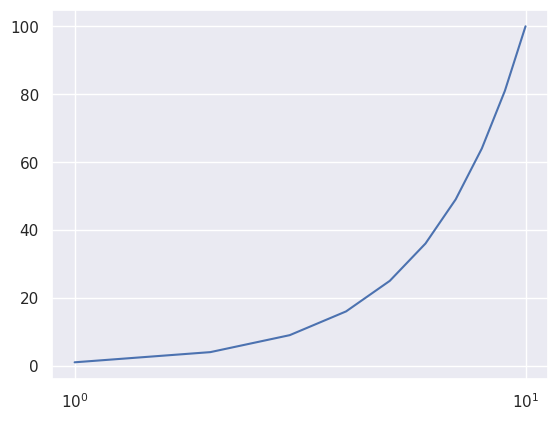

In [45]:
fig, ax = plt.subplots()
ax.plot(x, fx)
ax.set_xscale("log")
plt.show()

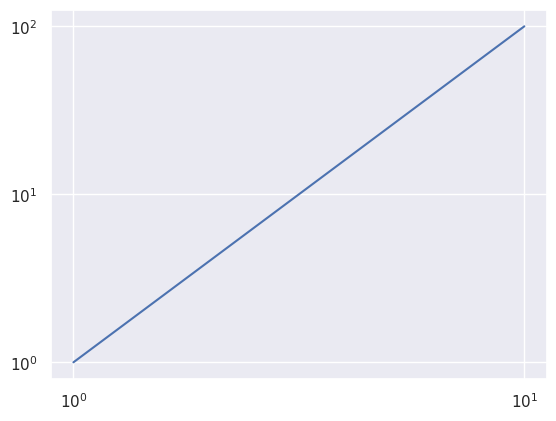

In [47]:
fig, ax = plt.subplots()
ax.plot(x, fx)
ax.set_xscale("log")
ax.set_yscale("log")
plt.show()

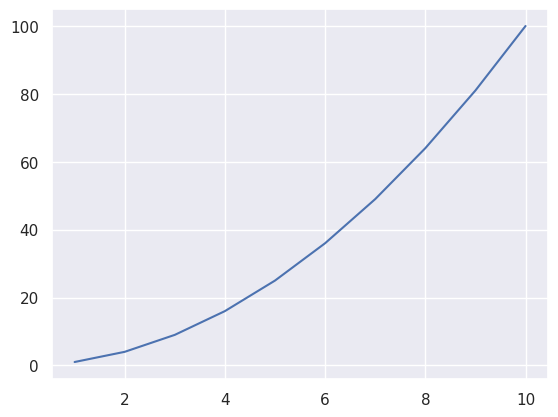

In [48]:
fig, ax = plt.subplots()
ax.plot(x, fx)
plt.show()


In [50]:
def plot_power(x, a):
  fx = power3(x, a)
  fig, ax = plt.subplots()
  ax.plot(x, fx)
  plt.show()

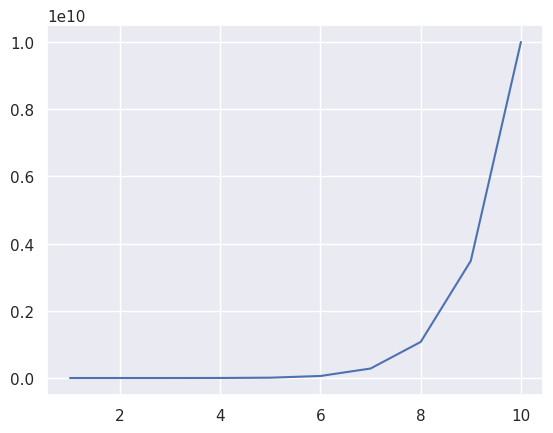

In [53]:
plot_power(np.arange(1, 11), 10)

## Ejercicio 16

In [54]:
boston = load_data("Boston")


In [55]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  lstat    506 non-null    float64
 12  medv     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


In [56]:
boston.head()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


<Axes: ylabel='Frequency'>

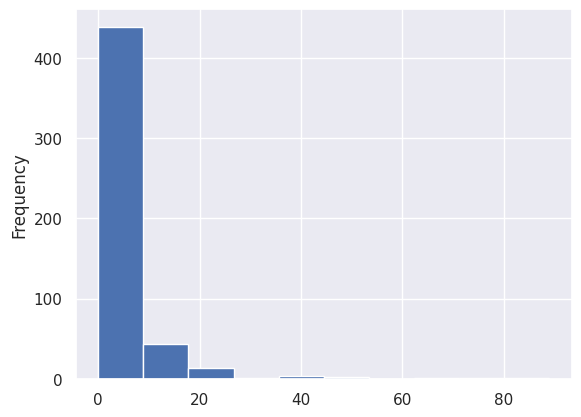

In [57]:
boston.crim.plot(kind="hist")

In [67]:
boston["crim01"] = boston.crim.map(lambda x: 1 if x > boston.crim.median() else 0)

In [58]:
boston.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,0.543993,-0.468536


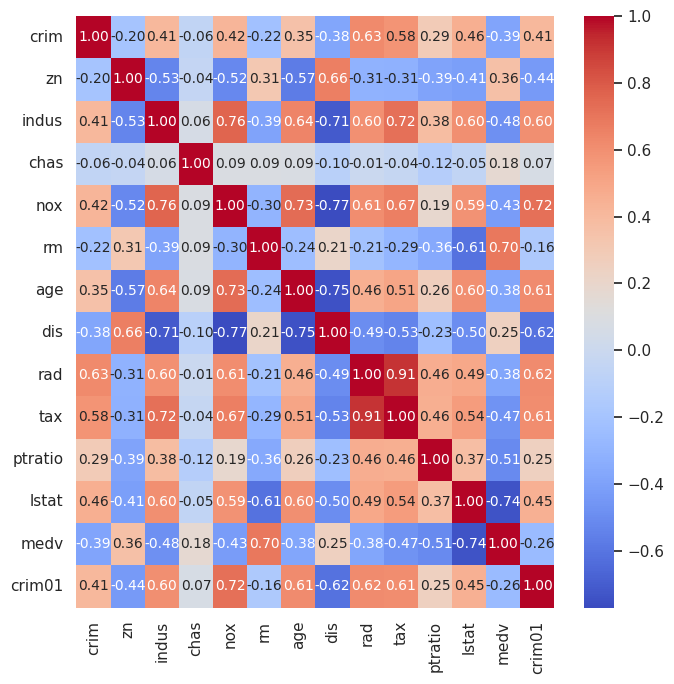

In [68]:
plt.figure(figsize=(7,7))

# 2. Crea el heatmap
sns.heatmap(boston.corr(),
            annot=True,
            cmap="coolwarm",
            fmt=".2f",
            annot_kws={"size": 10})

plt.tight_layout()
plt.show()

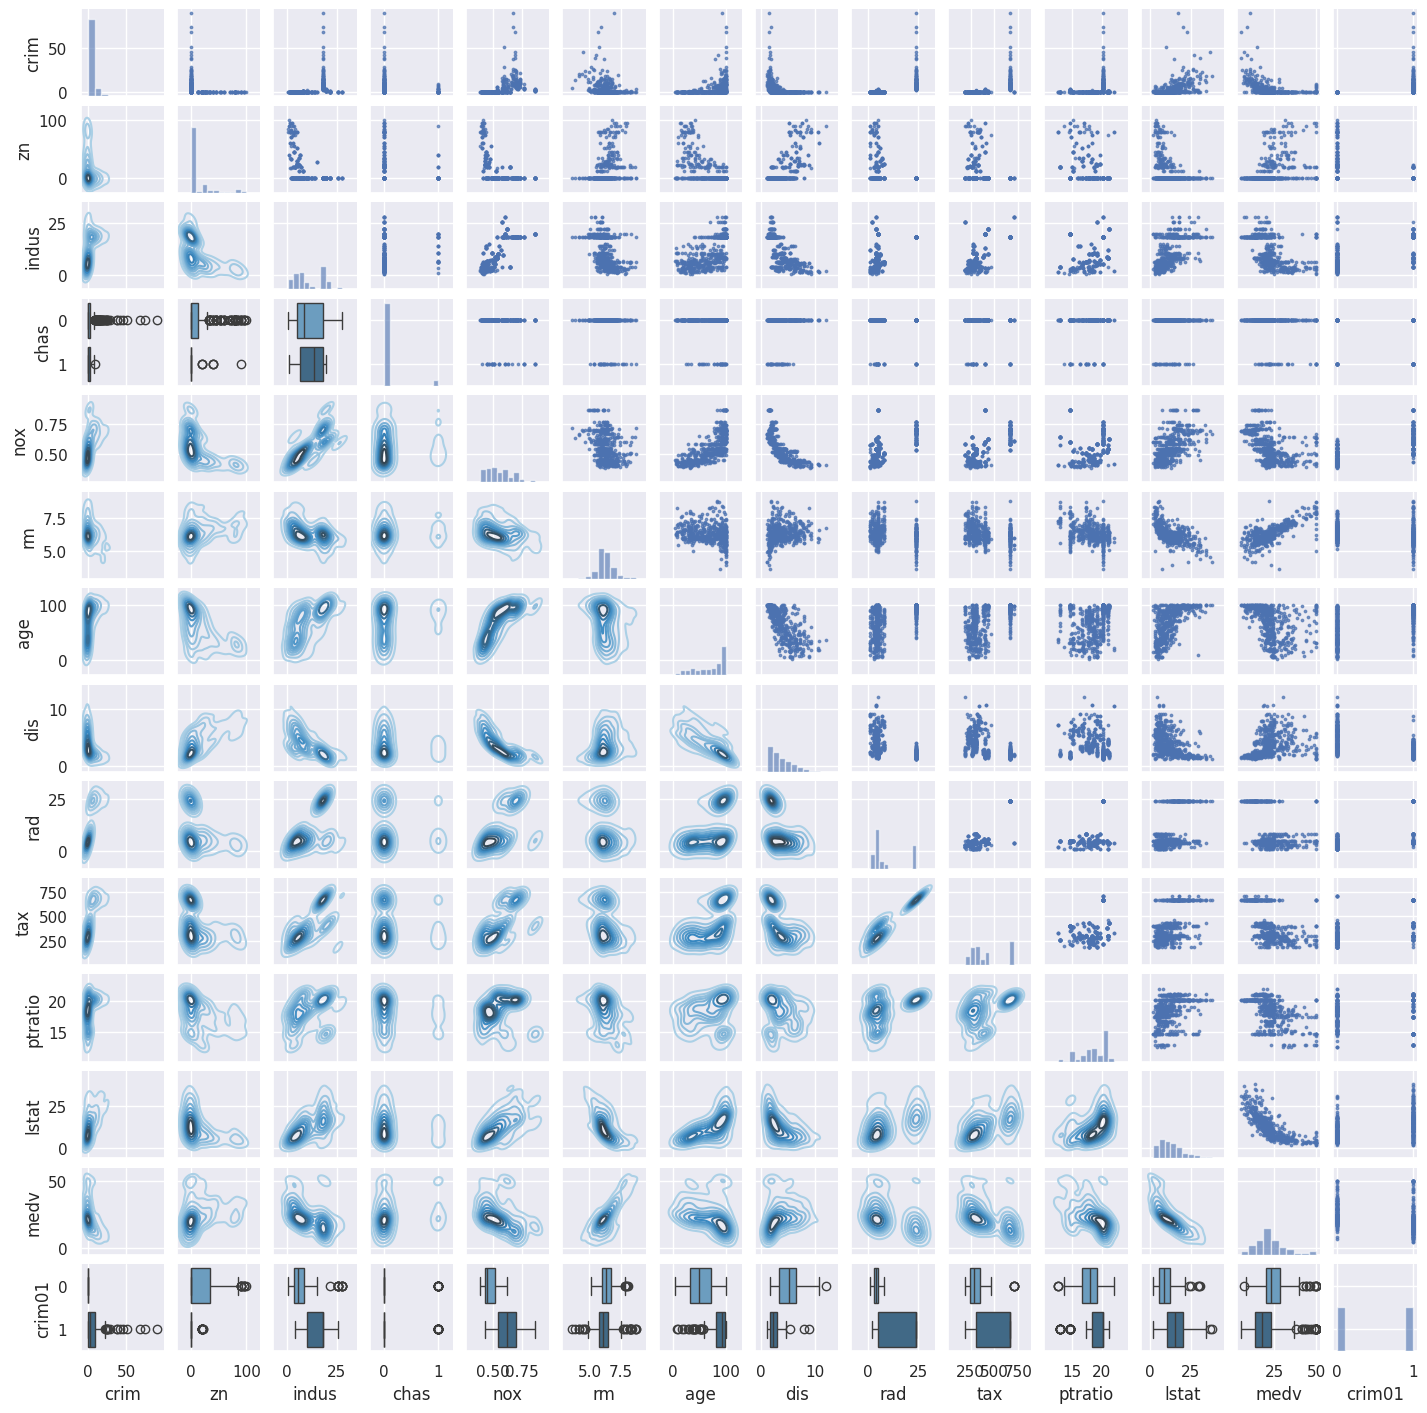

In [69]:
g = sns.PairGrid(boston)
g.map_upper(plt.scatter, s=3, alpha=0.7)
g.map_diag(plt.hist, alpha=0.6)

def lower_plots(x, y, **kwargs):
    if y.name in ['crim01', 'chas']:
        num_colors_needed = y.nunique()
        sns.boxplot(x=x, y=y, orient='h', hue=y, palette=sns.color_palette('Blues_d', n_colors=num_colors_needed), **kwargs)  # Horizontal boxplot
    else:
        sns.kdeplot(x=x, y=y, cmap='Blues_d', **kwargs)  # KDE plot

g.map_lower(lower_plots)
g.figure.set_size_inches(14, 14);

In [70]:
boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv,crim01
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806,0.500000
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104,0.500495
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000,0.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000,0.000000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000,0.500000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000,1.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000,1.000000


In [71]:
features = ["nox", "rad", "dis", "tax", "indus", "lstat"]
design = MS(features)
X = design.fit_transform(boston)
y = boston.crim01

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=1)

In [73]:
model = LogisticRegression()
model.fit(X_train, y_train)
predicted = model.predict(X_test)
np.mean(y_test != predicted)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


np.float64(0.17105263157894737)